In [1]:
import ateam.sim.setup.batch_builder as bb
import ateam.sim.setup.default_props as defaults
import ateam.sim.setup as sim
import numpy as np

edge_props_base = {
    'nsyns': 5,
#     'syn_weight': 1e-5, 
    'delay': 0,
#     'target_sections': ['apical'],
    'dynamics_params': 'AMPA_ExcToExc.json',
    'model_template': 'exp2syn'
}

template = "/allen/aibs/mat/tmchartrand/bmtk_networks/biophys_components_shared/default_config.json"
sm = sim.SimManager(config_template=template, overwrite=True, sim_folder=None)

cell_id = 525133308
node_props_base = defaults.cellprops_active(cell_id)
input_net = bb.build_input_net_simple()

distance_list = np.linspace(0, 350, 15)
interval = 1
spike_time = 0.3
linked_edge_props = {'distance_range_min':distance_list, 'distance_range_max':distance_list+interval}
linked_props_2 = {'syn_dist':['lumped','distributed'], 'nsyns':[1,5], 'syn_weight': [0.5e-4, 0.1e-4]}
ind_edge_props = {'target_sections': ['a','b']}

net = bb.build_batch_edge_props(input_net, node_props_base, edge_props_base, n_duplicates=3,
                                linked_dicts=[linked_edge_props, linked_props_2], **ind_edge_props)

sm.add_networks([net, input_net])
sm.add_membrane_report()
sm.write_spikeinput_vector(input_net.name, [spike_time])
sm.save_network_files()

In [2]:
sm.run_bionet_mpi(ncores=4)

NEURON -- VERSION 7.5 master (6b4c19f) 2017-09-25
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2016
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 modfiles/CaDynamics.mod modfiles/Ca_HVA.mod modfiles/Ca_LVA.mod modfiles/Ih.mod modfiles/Im.mod modfiles/Im_v2.mod modfiles/Kd.mod modfiles/K_P.mod modfiles/K_Pst.mod modfiles/K_T.mod modfiles/K_Tst.mod modfiles/Kv2like.mod modfiles/Kv3_1.mod modfiles/Nap_Et2.mod modfiles/Nap.mod modfiles/NaTa.mod modfiles/NaTa_t.mod modfiles/NaTg.mod modfiles/NaTs2_t.mod modfiles/NaTs.mod modfiles/NaV.mod modfiles/SK.mod modfiles/vecevent.mod
>>> 
>>> 
>>> 
>>> 

numprocs=4
2018-11-27 18:27:47,900 [INFO] Created log file
2018-11-27 18:27:47,901 [INFO] Running NEURON with mpi (4 cores).
2018-11-27 18:27:48,108 [INFO] Building cells.
2018-11-27 18:27:56,646 [INFO] Building recurrent connections
2018-11-27 18:27:56,646 [INFO] Building virtual cell stimulations for input
2018-11-27 18:27:56,920 [WARNING] Was unable to ru

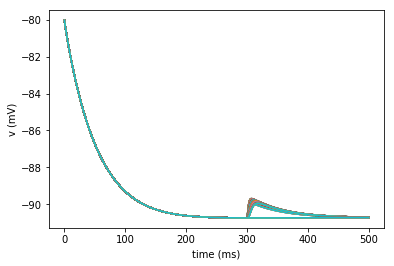

In [3]:
import bmtk.analyzer.cell_vars as cell_vars
import matplotlib.pyplot as plt
%matplotlib inline

cell_vars.plot_report(config_file=sm.config_path)

In [4]:
import ateam.analysis.cell_vars.psp_analysis as psp
import pandas as pd
import ateam.sim.setup as sim
sm = sim.SimManager()

spike_time = 0.3
props = psp.epsp_analysis(config_file=sm.config_path, t_min=100, t_duration=1000, t_spike=1000*spike_time)
syn_df = pd.DataFrame(props)
df = syn_df.join(bb.read_node_props_batch(sm.sim_folder))

groups = ["target_sections", "syn_dist", "distance_range_max"]
df_agg = df.dropna().groupby(groups)['amp','delay','width'].agg(['mean','std'])

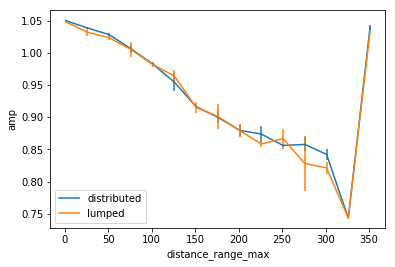

In [5]:
key = 'syn_dist'
yvar = 'amp'
ax = plt.axes()
df_sub = df_agg.xs("a", level="target_sections")
for val in df_agg.index.unique(level=key):
    df_sub.xs(val, level=key)[yvar].plot(y='mean', yerr='std', ax=ax, label=val)
    
ax.set(ylabel=yvar)
plt.show()

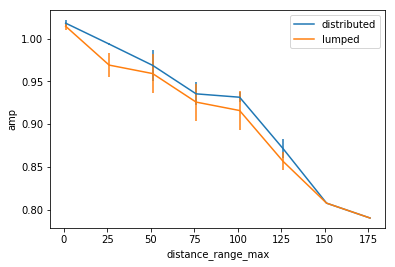

In [6]:
key = 'syn_dist'
yvar = 'amp'
ax = plt.axes()
df_sub = df_agg.xs("b", level="target_sections")
for val in df_agg.index.unique(level=key):
    df_sub.xs(val, level=key)[yvar].plot(y='mean', yerr='std', ax=ax, label=val)
    
ax.set(ylabel=yvar)
plt.show()

In [20]:
df[df["distance_range_max"]>290]

,amp,delay,gid,width,distance_range_max,distance_range_min,nsyns,syn_dist,syn_weight,target_sections
84,1.030844,297.89958,96,46.309262,301.0,300.0,1,lumped,0.00005,a
85,1.039125,297.99960,97,45.909182,301.0,300.0,1,lumped,0.00005,a
86,1.047133,298.09962,98,45.509102,301.0,300.0,1,lumped,0.00005,a
87,1.046076,298.09962,99,45.609122,301.0,300.0,5,distributed,0.00001,a
88,1.040502,297.99960,100,45.809162,301.0,300.0,5,distributed,0.00001,a
89,1.042968,298.09962,101,45.809162,301.0,300.0,5,distributed,0.00001,a
